# NPL: Natural Language Processing

사람이 사용하는 언어를 처리하고 해석

- 자연어 처리 기초
- 감성 분석
- 자연어 전처리


<br>

## 1. 자연어 처리 기초

형태소 분석기 (Okt)

- konlpy: 한국어 처리를 위한 형태소 분석기
- 형태소: 의미를 가지는 요소로서는 더 이상 분석할 수 없는 가장 작은 말의 단위

CountVectorizer

- 각 문장에서 단어 출현 횟수를 카운팅하는 방법
- BOW (Bag Of Word)

TfidfVectorizer

- 다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법
- TF-IDF (Term Frequency - Inverse Document Frequency)


In [1]:
# 라이브러리 불러오기
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# konlpy 설치
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 17.7 MB/s eta 0:00:00


In [3]:
# 라이브러리 불러오기 (okt)
import konlpy
from konlpy.tag import Okt
tokenizer = Okt()

In [4]:
# 토큰화 (형태소 단위)
text = "함께 탐험하며 성장하는 AI 학교 AIFFEL"
tokenizer.morphs(text)

['함께', '탐험', '하며', '성장하는', 'AI', '학교', 'AIFFEL']

In [5]:
# 토큰화 (명사만 추출)
tokenizer.nouns(text)

['탐험', '학교']

In [6]:
# 토큰화 (품사 태깅)
tokenizer.pos(text)

[('함께', 'Adverb'),
 ('탐험', 'Noun'),
 ('하며', 'Verb'),
 ('성장하는', 'Adjective'),
 ('AI', 'Alpha'),
 ('학교', 'Noun'),
 ('AIFFEL', 'Alpha')]

<br>

### CountVectorizer

In [7]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [8]:
# 단어 토큰화 (Okt)
words = tokenizer.morphs(text)

In [9]:
# 데이터 학습
vect.fit(words)

CountVectorizer()

In [10]:
# 학습된 어휘
vect.get_feature_names_out()

array(['ai', 'aiffel', '성장하는', '탐험', '하며', '학교', '함께'], dtype=object)

In [11]:
# 단어 사전
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [12]:
# 단어 사전 크기
len(vect.vocabulary_)

7

In [13]:
# 인코딩
df_t = vect.transform(words)

In [14]:
# 인코딩된 데이터 Matrix
df_t.toarray()

array([[0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0]])

In [15]:
# 어휘와 피처 (데이터 프레임)
pd.DataFrame(df_t.toarray(), columns=vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0


In [16]:
# test
test = "AI 공부하며 함께 성장해요!"

In [17]:
# 단어 토큰화 (Okt)
words = tokenizer.morphs(test)
words

['AI', '공부', '하며', '함께', '성장해요', '!']

In [18]:
# 인코딩된 데이터 Matrix
test_t = vect.transform(words)
test_t.toarray()

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [19]:
# 어휘와 피처 (데이터 프레임)
pd.DataFrame(test_t.toarray(), columns=vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0


<br>

### TfidfVectorizer

In [20]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
# tf-idf 활용 어휘 사전 구축
vect = TfidfVectorizer()
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [22]:
# 인코딩된 데이터 Matrix
vect.transform(words).toarray()

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

<br>
<br>

## 2. 감성 분석

In [23]:
# 라이브러리 불러오기
import pandas as pd

In [24]:
# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt', sep='\t')

<br>

### EDA 및 데이터 전처리

In [25]:
# 데이터 샘플
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [26]:
# 데이터 크기
df.shape

(150000, 3)

In [27]:
# 타겟 확인
df['label'].value_counts()

,count
label,
0,75173
1,74827


In [28]:
# 결측치
df.isnull().sum()

,0
id,0
document,5
label,0


In [29]:
# 결측치 제거
print(df.shape)
df = df.dropna()
print(df.shape)

(150000, 3)
(149995, 3)


In [30]:
# 피처 엔지니어링 (문장의 길이)
df['len'] = df['document'].apply(len)
df.head()

,id,document,label,len
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33
2,10265843,너무재밓었다그래서보는것을추천한다,0,17
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61


<Axes: ylabel='Frequency'>

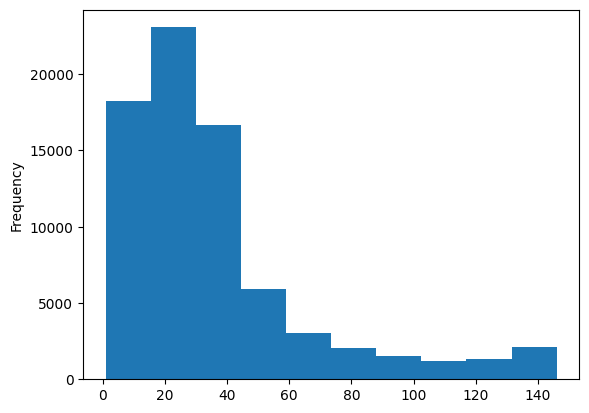

In [31]:
# len 시각화 (label == 0)
import matplotlib.pyplot as plt
df[df.label==0]['len'].plot(kind='hist')

<Axes: ylabel='Frequency'>

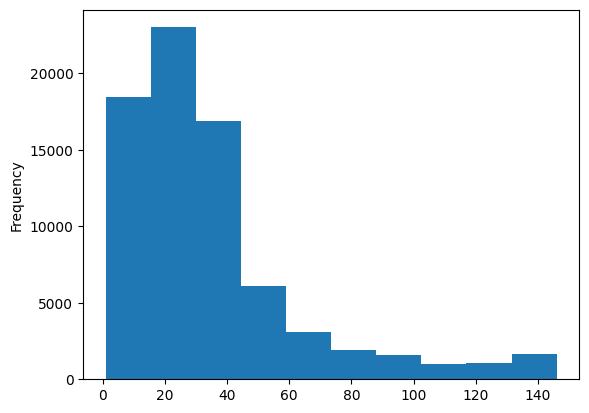

In [32]:
# len 시각화 (label == 1)
df[df.label==1]['len'].plot(kind='hist')

In [33]:
# 데이터 샘플링 df[:1000]
df = df[:1000]
df.shape

(1000, 4)

In [34]:
# 토큰화 + 인코딩
import konlpy
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer

tokenizer = Okt()

vect = CountVectorizer(tokenizer=tokenizer.morphs)
vectors = vect.fit_transform(df['document'])

<br>

### 머신러닝

In [35]:
# 머신러닝 -> 교차검증(f1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='f1', cv=5).mean()

np.float64(0.6634352457852256)

<br>
<br>

## 3. 자연어 전처리

한글을 다룰 때 꼭 알아야할 5가지

- 어휘 사전 구축
    - 00% 이상 나타나는 단어 무시
    - 최소 N개의 문장에만 나타나는 단어만 유지

- 불용어(stopword)
    - 큰 의미가 없는 단어
    - 예) 을, 는, 이, 가, 여기, 저기

- 띄어쓰기
- 반복되는 글자 정리
- 맞춤법 검사

### 1) 어휘 사전 구축

In [36]:
# 토큰화(max_df) 0% 이상 나타나는 단어 무시 - N개 보다 큰 단어 수 무시
vect = CountVectorizer(tokenizer=tokenizer.morphs, max_df=10)
vectors = vect.fit_transform(df['document'])

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()

np.float64(0.643)

In [37]:
# 토큰화(min_df) 최소 0개의 문장에만 나타나는 단어만 유지 - N개 보다 작은 단어 수 무시
vect = CountVectorizer(tokenizer=tokenizer.morphs, min_df=2)
vectors = vect.fit_transform(df['document'])

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()

np.float64(0.689)

<br>

### 2) 불용어(stopword)

In [38]:
# stop_words
text = "함께 탐험하며 성장하는 AI 학교 AIFFEL"
stop_words = ['하며', 'ai']

vect = CountVectorizer(stop_words=stop_words)
words = tokenizer.morphs(text)  # Okt
vect.fit(words)
vect.vocabulary_

{'함께': 4, '탐험': 2, '성장하는': 1, '학교': 3, 'aiffel': 0}

<br>

### 3) 띄어쓰기

- https://github.com/haven-jeon/PyKoSpacing

In [39]:
# Spacing 설치
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-utabxo2s
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-utabxo2s
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit b32a889cbd10b006d2f4aba118f0cd5b677e2979
  Preparing metadata (setup.py) ... done
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2286920 sha256=5d31578b306af857b2cb6c43db768260d60723b671ec726c9dac292ab8c1256c
  Stored in directory: /tmp/pip-ephem-wheel-cache-x8412r0u/wheels/1f/3f/64/6d5b2c9ba9cd5aa624676868e8ae8ec684672ce1bcbe20add8
Successfully built pykospacing


In [1]:
# 띄어쓰기
from pykospacing import Spacing

spacing = Spacing()
text = "함께탐험하며성장하는AI학교AIFFEL"
spacing(text)

'함께 탐험하며 성장하는 AI 학교 AIFFEL'

<br>

### 4) 반복되는 글자 정리

- https://github.com/lovit/soynlp

In [2]:
# soynlp 설치
!pip install soynlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 24.6 MB/s eta 0:00:00


In [3]:
# 댓글 데이터에 등장하는 반복되는 이모티콘 정리
from soynlp.normalizer import *
emoticon_normalize('하하하하하ㅋㅋㅋㅋㅋㅋㅋ호호호호호ㅠㅠㅠㅠㅠㅠ', num_repeats=3)

'하하하ㅋㅋㅋ호호호ㅠㅠㅠ'

<br>

### 맞춤법 검사기

- https://github.com/ssut/py-hanspell  
- 갑작스러운 정책 변경으로 hanspell 사용이 불가능한 상황

In [7]:
# py-hanspell 설치
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-1cj_gkn1
  Running command git clone --filter=blob:none --quiet https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-1cj_gkn1
  Resolved https://github.com/ssut/py-hanspell.git to commit fdc6ca50c19f1c85971437a072d89d4e5ce024b8
  Preparing metadata (setup.py) ... done
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4812 sha256=96aa84505b06cbce9de6670322cf0312f5d4b8e8d84636b101f82aa7df0e118f
  Stored in directory: /tmp/pip-ephem-wheel-cache-kgjsmlh4/wheels/18/0f/39/d0e3972de3368ba3ab62817cd7b17a74123414afd774ce604b
Successfully built py-hanspell


In [ ]:
# 맞춤법 검사
from hanspell import spell_checker
text = '알파고 이전, 2015년부터 만들 어진 최초의AI 커뮤니티 모두의연구소.학연, 지연, 모두연이라는 말이나올만큼 AI의 보금자리로서 중요한 역할을 하고있는 모두의연구소에서 만들었습니다. AI기술을 커뮤니티로 배우는 유일 한 기관 아이펠과 함께 밝은 미래를 만들어보세요.'
result = spell_checker.check(text)
result = spell_checker.check(text)
result.as_dict()

In [ ]:
# 수정된 문장
result.checked